# Estimating Confidence in Models and Parameters: I

In [2]:
%matplotlib inline
import tellurium as te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Which model is best?

In [101]:
# Set-up
if False:
    STD = 0.1
    LENGTH = 10
    XVS = range(LENGTH)
    TRAIN_ERRORS = np.random.normal(0, STD, LENGTH)
    TEST_ERRORS = np.random.normal(0, STD, LENGTH)

In [99]:
# Model
def makeData(xvs, param=-0.5, errors=TRAIN_ERRORS):
    values = np.array(xvs)
    results = 1 - np.exp(param*values)
    if errors is not None:
        results = results + errors
    return results

In [106]:
# Create dependent variables
Y_PURE = makeData(XVS, errors=None)
Y_TRAIN = makeData(XVS, errors=TRAIN_ERRORS)
Y_TEST = makeData(XVS, errors=TEST_ERRORS)

In [104]:
def plotData(yvs=Y_TRAIN, line=None, **kwargs):
    plt.scatter(XVS, yvs , color='b')
    if line is not None:
        plt.plot(xvs, line, color='r')
    plt.xlabel("x", fontsize=18)
    plt.ylabel("y", fontsize=18)

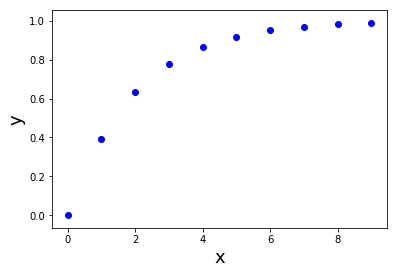

In [108]:
# True model
plotData(line=None, yvs=Y_PURE)

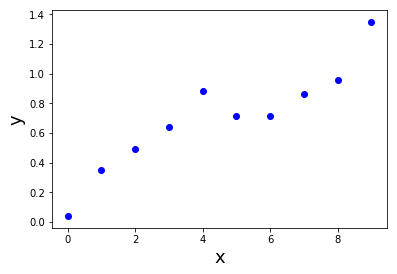

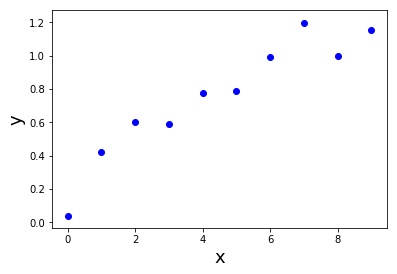

In [139]:
# Model with training data and test data
plotData(line=None, yvs=Y_TRAIN)
plt.figure()
plotData(line=None, yvs=Y_TEST)

In [116]:
def regress(y_train=Y_TRAIN, y_test=Y_TEST, is_first_order=True):
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    df = pd.DataFrame({'x1': xvs})
    df['constant'] = [1 for _ in range(len(df))]
    if not is_first_order:
        df['x2'] = [v*v for v in df['x1']]
        df['x3'] = [v*v*v for v in df['x1']]
        df['x4'] = [v*v*v*v for v in df['x1']]
    mat = df.as_matrix()
    regr.fit(mat, np.array(y_train))

    # Make predictions using the testing set
    y_preds = regr.predict(mat)

    print('R2: %.2f' % r2_score(y_test, y_preds))
    return y_preds


R2: 0.85
R2: 0.97


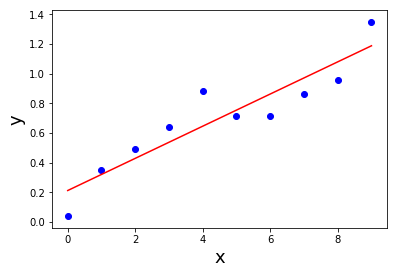

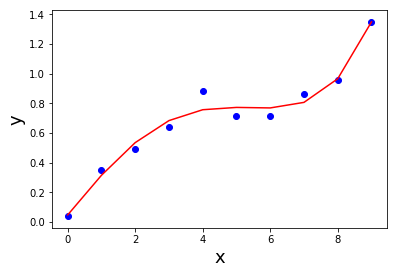

In [112]:
# Evaluations on training data
y_preds = regress(is_first_order=True)
plotData(line=y_preds)
plt.figure()
y_preds = regress(is_first_order=False)
plotData(line=y_preds)

R2: 0.85
R2: 0.76


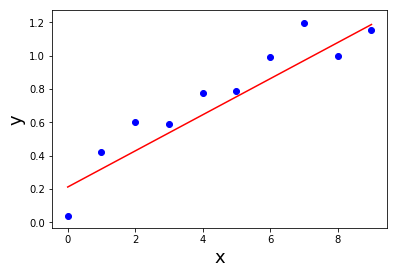

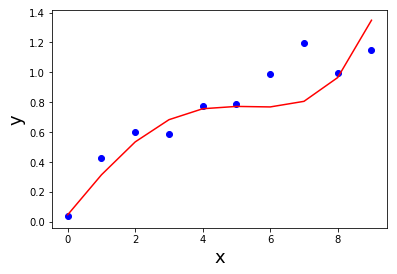

In [138]:
# Evaluations on test data
y_preds = regress(y_test=Y_TEST, is_first_order=True)
plotData(yvs=Y_TEST, line=y_preds)
plt.figure()
y_preds = regress(y_test=Y_TEST, is_first_order=False)
plotData(yvs=Y_TEST, line=y_preds)

R2: 0.85
R2: 0.76


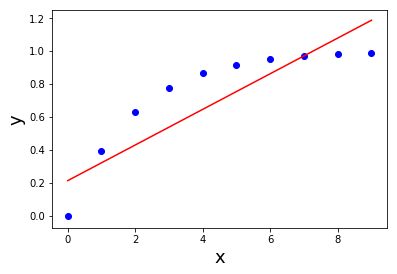

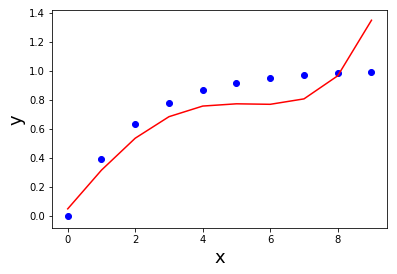

In [140]:
# Evaluations on true data
y_preds = regress(y_test=Y_TEST, is_first_order=True)
plotData(yvs=Y_PURE, line=y_preds)
plt.figure()
y_preds = regress(y_test=Y_TEST, is_first_order=False)
plotData(yvs=Y_PURE, line=y_preds)

## Using Regression in Python

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Clustered Values and R2

In [ ]:
# Regression model
def regress(xvs, yv):
    regr = linear_model.LinearRegression()
    mat = np.matrix(xvs)
    # Train the model using the training sets
    df = pd.DataFrame({'x1': xvs})
    df['constant'] = [1 for _ in range(len(df))]
    if not is_first_order:
        df['x2'] = [v*v for v in df['x1']]
        df['x3'] = [v*v*v for v in df['x1']]
        df['x4'] = [v*v*v*v for v in df['x1']]
    mat = df.as_matrix()
    regr.fit(mat, np.array(y_train))

    # Make predictions using the testing set
    y_preds = regr.predict(mat)

    print('R2: %.2f' % r2_score(y_test, y_preds))
    return y_preds

In [134]:
LENGTH = 20
STD = 0.1
xv = np.random.normal(0,1, LENGTH - 1)
xv = np.concatenate([xv, np.array([LENGTH])])
yv = np.random.normal(0,1, LENGTH - 1)
yv = np.concatenate([yv, np.array([LENGTH])])
mat = np.matrix([np.repeat(1, LENGTH), xv])
yv

array([-1.33454193e-01, -5.11949002e-01,  1.06013334e+00,  2.68593964e-02,
       -4.70511538e-01, -2.10320747e+00, -1.02043086e+00,  9.78950117e-01,
       -7.83333336e-01, -7.96734605e-02,  7.87402436e-01, -5.47387527e-01,
        4.00525005e-01,  1.85953138e-02, -1.71921740e+00,  9.18573782e-01,
       -1.70869059e+00,  1.00173142e+00,  1.59362889e+00,  2.00000000e+01])

In [146]:
LENGTH = 20
STD = 1
# Construct vectors with 19 random values and a 20
xv = np.random.normal(0, STD, LENGTH - 1)
xv = np.concatenate([xv, np.array([LENGTH])])
yv = np.random.normal(0,STD, LENGTH - 1)
yv = np.concatenate([yv, np.array([LENGTH])])
# Construct a matrix (has 1’s in the first column)
mat = np.matrix([np.repeat(1, LENGTH), xv])
mat = mat.T # Transpose from 2 X 20 to 20 X 2


(20, 2)

In [155]:
# Fit, find constants evaluate
regr = linear_model.LinearRegression()
regr.fit(mat, yv)
# Predicted values
y_preds = regr.predict(mat)
# R-squared
rsq = r2_score(yv, y_preds)
# Values of the constants
coefs = regr.coef_
#
print("Predictions: ", y_preds)
print("RSQ: ", rsq)
print("Coeficients: ", coefs)

Predictions:  [ 0.5992776  -0.36825951  0.94812368  0.27658397 -1.67751534  0.87914986
  1.18380734  0.52331654 -0.92446081 -0.93692269 -0.41720302 -0.75622016
 -0.05087547  1.29537929  1.30364225  0.56489286  0.21559136 -0.20953949
 -0.3560586  19.15821917]
RSQ:  0.906612811655096
Coeficients:  [0.         0.96995727]


In [153]:
regr.coef_

array([0.        , 0.96995727])

## Residuals in Modeling

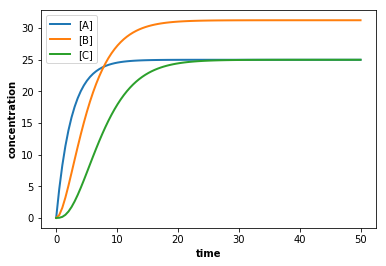

In [27]:
te.setDefaultPlottingEngine('matplotlib')
model = """
model test
    species A, B, C;

    J0: -> A; v0
    A -> B; ka*A;
    B -> C; kb*B;
    J1: C ->; C*kc
    ka = 0.4;
    v0 = 10
    kb = 0.8*ka
    kc = ka

end
"""
r = te.loada(model)
result1 = r.simulate(0, 50, 100)
r.plot(xtitle="time", ytitle="concentration")

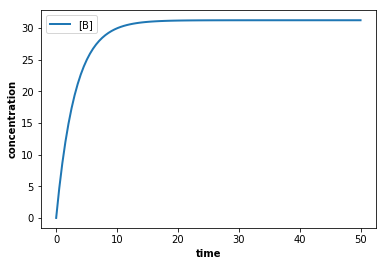

In [26]:
te.setDefaultPlottingEngine('matplotlib')
model = """
model test
    species B;

    J0: -> B; v0
    J1: B ->; B*kb
    ka = 0.4;
    v0 = 10
    kb = 0.8*ka

end
"""
r = te.loada(model)
result2 = r.simulate(0, 50, 100)
r.plot(xtitle="time", ytitle="concentration")

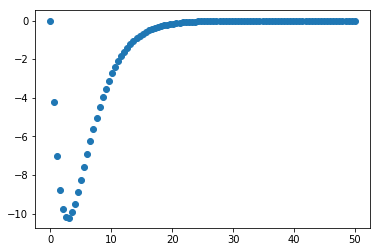

In [36]:
obs = result1.transpose()[2]
pred = result2.transpose()[1]
time = result1.transpose()[0]
plt.scatter(time, obs-pred)

## Chi Square Analysis

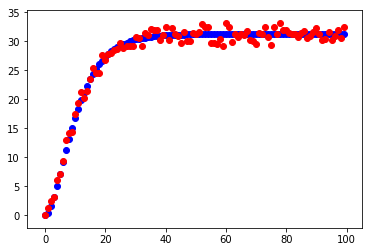

In [44]:
# Construct the reference model as a random error on the the first model
ERROR_VARIANCE = 1
PURE_OBSERVATIONS = result1.transpose()[2]
OBSERVATIONS = PURE_OBSERVATIONS + np.random.normal(0, ERROR_VARIANCE, len(result1))
plt.scatter(range(len(PURE_OBSERVATIONS)), PURE_OBSERVATIONS, color='b')
plt.scatter(range(len(PURE_OBSERVATIONS)), OBSERVATIONS, color='r')

In [42]:
OBSERVATIONS

[-26.35020242  -5.04519239  -8.1528868   -3.95305316   2.62654583
  -3.17799754  -3.9548154   13.57079694  18.01154345  18.52511264
  17.40557061  10.52074497  14.28182797  27.14807426  30.69646581
  17.28399922  31.89849862  22.70970201   8.74382191  34.707957
  24.48568964  25.56108231   8.25391089  31.621219    38.09069614
  37.20471846  28.84027735  20.80766975  35.12226633   4.41587935
  34.44867923  13.99887047  22.92064491  12.47389245  31.31947272
  28.28237613  21.01782164  43.9749835   26.66191543   9.45409369
  33.88804392  29.86226919  29.99145574  34.72232344  37.23116884
  30.21035064  37.06443394  36.0900419   21.5644476   32.3431115
  39.03874894  22.35545118  36.48898012  36.82801709  31.68818779
  32.85946249  39.09918965  25.43521617  33.25277099  23.41529769
  35.01070884  18.50514274  27.46830389  21.71164087  42.60952365
  18.60731849  18.88351142  37.02420504  42.5372668   36.07839637
  23.88741303  29.96855259  33.15707078  21.33961239  18.95167309
  10.02922692